## Import Library

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

## Fungsi Random Walk

In [59]:
def calculate_daily_returns(closing_prices):
    # Menghitung perubahan harian sebagai persentase perubahan
    daily_returns = (closing_prices[1:] - closing_prices[:-1]) / closing_prices[:-1]
    return daily_returns

def calculate_statistics(daily_returns):
    # Menghitung mean dan standard deviation dari perubahan harian
    mean_return = np.mean(daily_returns)
    std_return = np.std(daily_returns, ddof=1)  # ddof=1 untuk menggunakan rumus deviasi standar sampel
    return mean_return, std_return

def stock_price_random_walk(days, initial_price, mean_daily_return, std_daily_return):
  prices = np.zeros(days)
  prices[0] = initial_price

  for day in range(1, days):
      # Menggunakan distribusi normal untuk menghasilkan perubahan harian
      daily_return = np.random.normal(mean_daily_return, std_daily_return)
      # Menggunakan rumus perubahan harga saham
      prices[day] = prices[day-1] * (1 + daily_return)
  return prices

def random_walk_with_probabilities(initial_price, num_days, probabilities):
  prices = [initial_price]
  for _ in range(1, num_days):
    price = prices[-1] * (1 + np.random.uniform(-0.01, 0.01))  # Menggunakan variasi acak tetap
    prices.append(price)
  return prices

## Sektor Barang Konsumen Primer - PT Indofood Sukses Makmur Tbk (INDF)

In [60]:
# Download data saham
data = yf.download("INDF", start="2024-01-01", end="2024-12-31")

# Simpan data ke file CSV
data.to_csv("data_saham_INDF.csv")
print("Data saham berhasil disimpan ke 'data_saham_INDF.csv'")

[*********************100%***********************]  1 of 1 completed

Data saham berhasil disimpan ke 'data_saham_INDF.csv'


In [61]:
df_INDF = pd.read_csv('data_saham_INDF.csv')
df_INDF

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,INDF,INDF,INDF,INDF,INDF,INDF
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,34.744998931884766,34.744998931884766,34.93000030517578,34.529998779296875,34.529998779296875,5400
3,2024-01-03,34.88999938964844,34.88999938964844,34.939998626708984,34.630001068115234,34.630001068115234,900
4,2024-01-04,35.422000885009766,35.422000885009766,35.54999923706055,35.422000885009766,35.45000076293945,2000
...,...,...,...,...,...,...,...
245,2024-12-18,37.821998596191406,37.821998596191406,38.29999923706055,37.736000061035156,38.279998779296875,1100
246,2024-12-19,37.88600158691406,37.88600158691406,38.0,37.88600158691406,38.0,900
247,2024-12-20,37.77199935913086,37.77199935913086,37.94499969482422,37.599998474121094,37.599998474121094,800
248,2024-12-23,37.73400115966797,37.73400115966797,37.75,37.525001525878906,37.525001525878906,700


In [62]:
# Konversi kolom 'Close' ke tipe numerik
df_INDF['Close'] = pd.to_numeric(df_INDF['Close'], errors='coerce')

# Drop baris yang mengandung nilai NaN setelah konversi
df_INDF = df_INDF.dropna(subset=['Close'])


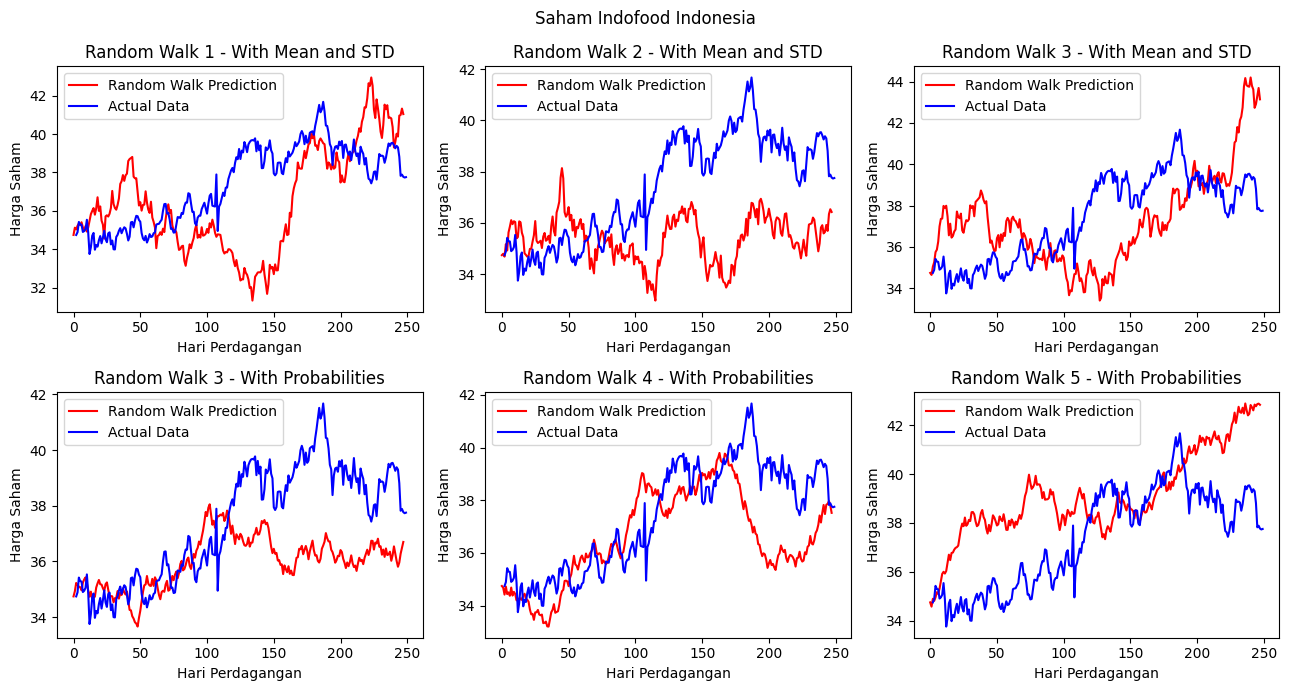

In [63]:
# Menghitung perubahan harian
numpy_array = df_INDF['Close'].to_numpy()
daily_returns = calculate_daily_returns(numpy_array)

# Menghitung mean dan standard deviation dari perubahan harian
mean, std = calculate_statistics(daily_returns)
# Parameter untuk simulasi random walk saham indofood
num_days = len(df_INDF)  # Jumlah hari perdagangan dalam satu tahun kerja
initial_stock_price = df_INDF['Close'][2]  # Harga saham awal
probabilities = [0.4, 0.3, 0.3]  # Probabilitas untuk langkah naik, turun, dan tetap

# Visualisasi Random Walk
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
axs = axs.flatten()

for i in range(6):
  if (i < 3):
    indofood_stock_prices = stock_price_random_walk(num_days, initial_stock_price, mean, std)
    axs[i].plot(indofood_stock_prices, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i+1} - With Mean and STD')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')
  else:
    prices_with_probabilities = random_walk_with_probabilities(initial_stock_price, num_days, probabilities)
    axs[i].plot(prices_with_probabilities, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i} - With Probabilities')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')

fig.suptitle('Saham Indofood Indonesia')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Sektor Keuangan - PT Bank Central Asia Tbk (BBCA)

In [64]:
# Download data saham
data = yf.download("BBCA", start="2024-01-01", end="2024-12-31")

# Simpan data ke file CSV
data.to_csv("data_saham_BBCA.csv")
print("Data saham berhasil disimpan ke 'data_saham_BBCA.csv'")

[*********************100%***********************]  1 of 1 completed

Data saham berhasil disimpan ke 'data_saham_BBCA.csv'


In [65]:
df_BBCA = pd.read_csv('data_saham_BBCA.csv')
df_BBCA

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,BBCA,BBCA,BBCA,BBCA,BBCA,BBCA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,62.450721740722656,63.470001220703125,63.779998779296875,63.33000183105469,63.54999923706055,166700
3,2024-01-03,62.263771057128906,63.279998779296875,63.5099983215332,62.88999938964844,63.0099983215332,164700
4,2024-01-04,62.4310417175293,63.45000076293945,63.709999084472656,63.15999984741211,63.29999923706055,163100
...,...,...,...,...,...,...,...
245,2024-12-18,70.33999633789062,70.33999633789062,72.52999877929688,70.18000030517578,72.48999786376953,383700
246,2024-12-19,70.12000274658203,70.12000274658203,70.97000122070312,70.08000183105469,70.81999969482422,351900
247,2024-12-20,70.68000030517578,70.68000030517578,71.19999694824219,69.55999755859375,69.66000366210938,364500
248,2024-12-23,71.25,71.25,71.25,70.25,70.5,235700


In [66]:
# Konversi kolom 'Close' ke tipe numerik
df_BBCA['Close'] = pd.to_numeric(df_BBCA['Close'], errors='coerce')

# Drop baris yang mengandung nilai NaN setelah konversi
df_BBCA = df_BBCA.dropna(subset=['Close'])


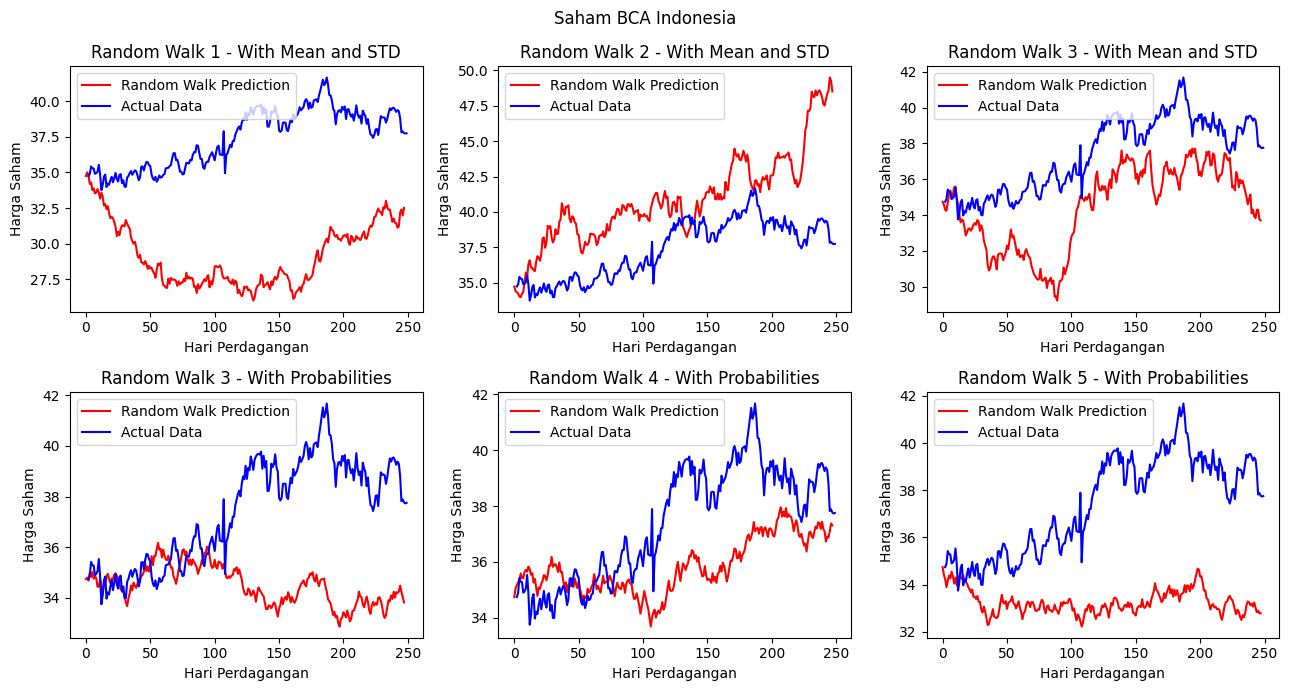

In [67]:
# Menghitung perubahan harian
numpy_array = df_INDF['Close'].to_numpy()
daily_returns = calculate_daily_returns(numpy_array)

# Menghitung mean dan standard deviation dari perubahan harian
mean, std = calculate_statistics(daily_returns)
# Parameter untuk simulasi random walk saham Bank BCA
num_days = len(df_INDF)  # Jumlah hari perdagangan dalam satu tahun kerja
initial_stock_price = df_INDF['Close'][2]  # Harga saham awal
probabilities = [0.4, 0.3, 0.3]  # Probabilitas untuk langkah naik, turun, dan tetap

# Visualisasi Random Walk
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
axs = axs.flatten()

for i in range(6):
  if (i < 3):
    BCA_stock_prices = stock_price_random_walk(num_days, initial_stock_price, mean, std)
    axs[i].plot(BCA_stock_prices, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i+1} - With Mean and STD')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')
  else:
    prices_with_probabilities = random_walk_with_probabilities(initial_stock_price, num_days, probabilities)
    axs[i].plot(prices_with_probabilities, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i} - With Probabilities')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')

fig.suptitle('Saham BCA Indonesia')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Sektor Barang Konsumen Non-Primer  - PT Ace Hardware Indonesia Tbk (ACES)

In [68]:
# Download data saham
data = yf.download("ACES", start="2024-01-01", end="2024-12-31")

# Simpan data ke file CSV
data.to_csv("data_saham_ACES.csv")
print("Data saham berhasil disimpan ke 'data_saham_ACES.csv'")

[*********************100%***********************]  1 of 1 completed

Data saham berhasil disimpan ke 'data_saham_ACES.csv'


In [69]:
df_ACES = pd.read_csv('data_saham_ACES.csv')
df_ACES

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,ACES,ACES,ACES,ACES,ACES,ACES
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,35.12666320800781,35.49100112915039,36.27000045776367,35.25,35.439998626708984,18900
3,2024-01-03,33.81922149658203,34.16999816894531,34.97999954223633,33.650001525878906,34.97999954223633,26500
4,2024-01-04,33.09671401977539,33.439998626708984,34.06999969482422,33.439998626708984,34.06999969482422,58800
...,...,...,...,...,...,...,...
245,2024-12-18,25.9689998626709,26.079999923706055,27.7189998626709,25.950000762939453,27.399999618530273,49300
246,2024-12-19,25.645000457763672,25.645000457763672,26.420000076293945,25.613000869750977,26.239999771118164,147300
247,2024-12-20,26.229999542236328,26.229999542236328,26.649999618530273,25.399999618530273,25.399999618530273,482000
248,2024-12-23,26.600000381469727,26.600000381469727,26.6200008392334,26.219999313354492,26.239999771118164,322700


In [70]:
# Konversi kolom 'Close' ke tipe numerik
df_ACES['Close'] = pd.to_numeric(df_ACES['Close'], errors='coerce')

# Drop baris yang mengandung nilai NaN setelah konversi
df_ACES = df_ACES.dropna(subset=['Close'])


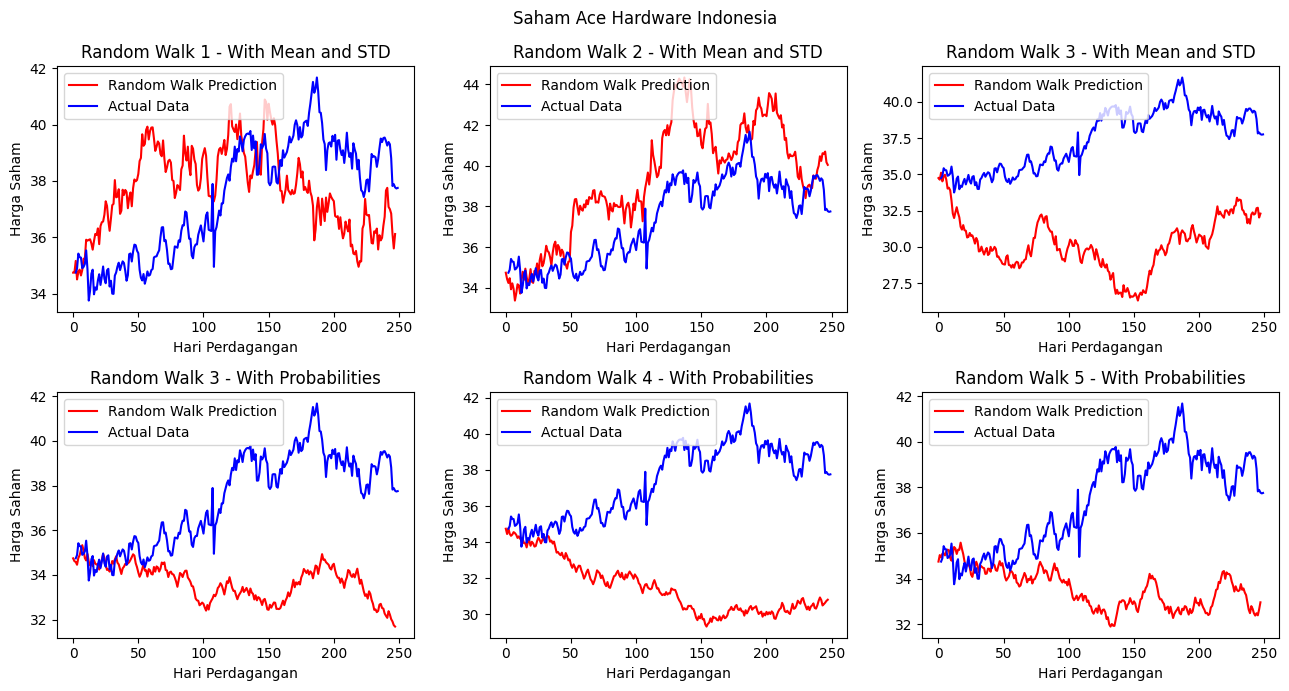

In [71]:
# Menghitung perubahan harian
numpy_array = df_INDF['Close'].to_numpy()
daily_returns = calculate_daily_returns(numpy_array)

# Menghitung mean dan standard deviation dari perubahan harian
mean, std = calculate_statistics(daily_returns)
# Parameter untuk simulasi random walk saham Bank AceHardware
num_days = len(df_INDF)  # Jumlah hari perdagangan dalam satu tahun kerja
initial_stock_price = df_INDF['Close'][2]  # Harga saham awal
probabilities = [0.4, 0.3, 0.3]  # Probabilitas untuk langkah naik, turun, dan tetap

# Visualisasi Random Walk
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
axs = axs.flatten()

for i in range(6):
  if (i < 3):
    AceHardware_stock_prices = stock_price_random_walk(num_days, initial_stock_price, mean, std)
    axs[i].plot(AceHardware_stock_prices, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i+1} - With Mean and STD')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')
  else:
    prices_with_probabilities = random_walk_with_probabilities(initial_stock_price, num_days, probabilities)
    axs[i].plot(prices_with_probabilities, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i} - With Probabilities')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')

fig.suptitle('Saham Ace Hardware Indonesia')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Sektor Pertambangan - PT PT Freeport Indonesia (FCX)

In [72]:
# Download data saham
data = yf.download("FCX", start="2024-01-01", end="2024-12-31")

# Simpan data ke file CSV
data.to_csv("data_saham_FCX.csv")
print("Data saham berhasil disimpan ke 'data_saham_FCX.csv'")

[*********************100%***********************]  1 of 1 completed

Data saham berhasil disimpan ke 'data_saham_FCX.csv'


In [73]:
df_FCX = pd.read_csv('data_saham_FCX.csv')
df_FCX

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,FCX,FCX,FCX,FCX,FCX,FCX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,41.56285858154297,42.09000015258789,42.540000915527344,41.7599983215332,41.959999084472656,9620900
3,2024-01-03,40.851871490478516,41.369998931884766,41.689998626708984,40.59000015258789,40.970001220703125,13723000
4,2024-01-04,41.02961730957031,41.54999923706055,41.58000183105469,40.720001220703125,41.119998931884766,11897500
...,...,...,...,...,...,...,...
245,2024-12-18,38.709999084472656,38.709999084472656,40.619998931884766,38.56999969482422,40.43000030517578,12501000
246,2024-12-19,38.2400016784668,38.2400016784668,39.220001220703125,37.66999816894531,38.7400016784668,15766500
247,2024-12-20,38.86000061035156,38.86000061035156,39.290000915527344,37.959999084472656,37.97999954223633,22372300
248,2024-12-23,39.25,39.25,39.34000015258789,38.560001373291016,38.91999816894531,8562500


In [74]:
# Konversi kolom 'Close' ke tipe numerik
df_FCX['Close'] = pd.to_numeric(df_FCX['Close'], errors='coerce')

# Drop baris yang mengandung nilai NaN setelah konversi
df_FCX = df_FCX.dropna(subset=['Close'])


In [75]:
df_FCX

,Price,Adj Close,Close,High,Low,Open,Volume
2,2024-01-02,41.56285858154297,42.090000,42.540000915527344,41.7599983215332,41.959999084472656,9620900
3,2024-01-03,40.851871490478516,41.369999,41.689998626708984,40.59000015258789,40.970001220703125,13723000
4,2024-01-04,41.02961730957031,41.549999,41.58000183105469,40.720001220703125,41.119998931884766,11897500
5,2024-01-05,40.8913688659668,41.410000,41.970001220703125,41.099998474121094,41.25,8420600
6,2024-01-08,41.671478271484375,42.200001,42.25,41.029998779296875,41.27000045776367,9226300
...,...,...,...,...,...,...,...
245,2024-12-18,38.709999084472656,38.709999,40.619998931884766,38.56999969482422,40.43000030517578,12501000
246,2024-12-19,38.2400016784668,38.240002,39.220001220703125,37.66999816894531,38.7400016784668,15766500
247,2024-12-20,38.86000061035156,38.860001,39.290000915527344,37.959999084472656,37.97999954223633,22372300
248,2024-12-23,39.25,39.250000,39.34000015258789,38.560001373291016,38.91999816894531,8562500


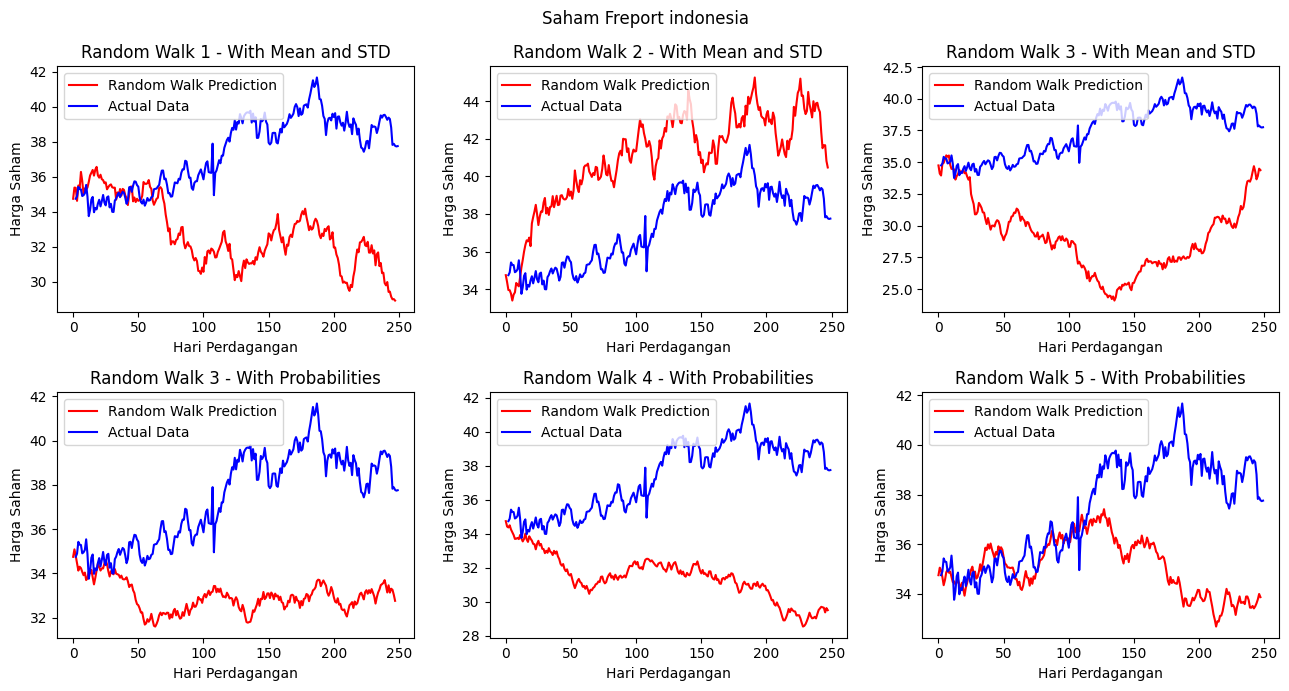

In [76]:
# Menghitung perubahan harian
numpy_array = df_INDF['Close'].to_numpy()
daily_returns = calculate_daily_returns(numpy_array)

# Menghitung mean dan standard deviation dari perubahan harian
mean, std = calculate_statistics(daily_returns)
# Parameter untuk simulasi random walk saham Bank AceHardware
num_days = len(df_INDF)  # Jumlah hari perdagangan dalam satu tahun kerja
initial_stock_price = df_INDF['Close'][2]  # Harga saham awal
probabilities = [0.4, 0.3, 0.3]  # Probabilitas untuk langkah naik, turun, dan tetap

# Visualisasi Random Walk
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
axs = axs.flatten()

for i in range(6):
  if (i < 3):
    AceHardware_stock_prices = stock_price_random_walk(num_days, initial_stock_price, mean, std)
    axs[i].plot(AceHardware_stock_prices, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i+1} - With Mean and STD')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')
  else:
    prices_with_probabilities = random_walk_with_probabilities(initial_stock_price, num_days, probabilities)
    axs[i].plot(prices_with_probabilities, color='red', label='Random Walk Prediction')
    axs[i].plot(df_INDF['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i} - With Probabilities')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')

fig.suptitle('Saham Freport indonesia')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()